Launch interactive version: 👉👉👉 [![Try ``dyce``](https://jupyterlite.readthedocs.io/en/latest/_static/badge.svg)](https://posita.github.io/dyce-notebooks/lab?path=stack-exchange%2Favg-bonus-201374%2Favg_bonus.ipynb) 👈👈👈 *[[source](https://github.com/posita/dyce-notebooks/tree/main/notebooks/stack-exchange/avg-bonus-201374)]*

## [``dyce``](https://posita.github.io/dyce/) solution to [“What is the average total ability score bonus for the best of 4 DCC Characters?”](https://rpg.stackexchange.com/a/201379/71245)

Once viewing this notebook in Jupyter Lab, select ``Run All Cells`` from the ``Run`` menu above.

In [1]:
# Install additional requirements if necessary
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    try:
        import anydyce
    except (ImportError, ModuleNotFoundError):
        requirements = ["anydyce~=0.2.0"]
        try:
            import piplite ; await piplite.install(requirements)
        except ImportError:
            import pip ; pip.main(["install"] + requirements)
    import anydyce

bonus: H({-3: 1, -2: 9, -1: 46, 0: 104, 1: 46, 2: 9, 3: 1})
bonus.total: 216


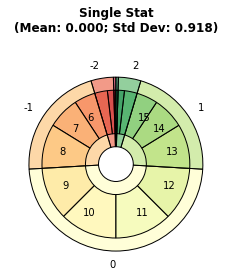

In [2]:
from dyce import H
from dyce.evaluation import HResult, foreach
from anydyce.viz import plot_burst_subplot
import matplotlib.pyplot

d6 = H(6)
stat = 3@d6
stat_to_bonus_map = {
    3: -3,
    4: -2, 5: -2,
    6: -1, 7: -1, 8: -1,
    9: 0, 10: 0, 11: 0, 12: 0,
    13: +1, 14: +1, 15: +1,
    16: +2, 17: +2,
    18: +3,
}

def stat_to_bonus(stat: HResult) -> int:
    return stat_to_bonus_map[stat.outcome]

bonus_for_single_stat = foreach(stat_to_bonus, stat=stat)
print(f"bonus: {bonus_for_single_stat}")
print(f"bonus.total: {bonus_for_single_stat.total}")

plot_burst_subplot(
    stat,
    bonus_for_single_stat,
    title=f"Single Stat\n(Mean: {bonus_for_single_stat.mean():.3f}; Std Dev: {bonus_for_single_stat.stdev():.3f})",
)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

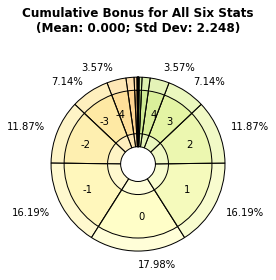

In [3]:
bonus_for_six_stats = 6@bonus_for_single_stat

plot_burst_subplot(
    bonus_for_six_stats,
    title=f"Cumulative Bonus for All Six Stats\n(Mean: {bonus_for_six_stats.mean():.3f}; Std Dev: {bonus_for_six_stats.stdev():.3f})",
)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [4]:
from dyce import P
from anydyce import BreakoutType, jupyter_visualize

character_pool = 4@P(bonus_for_six_stats)
best_of_four_bonus_for_six_stats = character_pool.h(-1)
title = f"Best-of-Four Cumulative Bonus\n(Mean: {best_of_four_bonus_for_six_stats.mean():.3f}; Std Dev: {best_of_four_bonus_for_six_stats.stdev():.3f})"

jupyter_visualize(
    ((title, best_of_four_bonus_for_six_stats),),
    default_breakout_type=BreakoutType.BURST,
)